In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 95% de los datos para entrenamiento y un 5% de los datos para validación
valid_idx  =  range ( len ( df ) - 14 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CAPE_POSIT_FREC', 'CSI_AUTOCRIT', 'CSI_EVITPROBL', 'CSI_RETISOC', 'CSI_PENSDESID', 'CSI_REESTCOGN', 'CSI_APOYOSOC', 'TRAUMA_FRECUENCIA', 'SCL90_IDEA_PARAN', 'ANSIEDADRASGO', 'CSI_RESPROBL']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.148269  0.342956  1.217898  1.069021 ...  0.390011  0.855644  1.43162   0.3248  ]
 [-0.610051 -0.36778  -1.003888 -0.626453 ... -0.999722 -0.31388   0.664479 -1.061789]
 [-0.456124 -0.900831  0.107005  1.280955 ... -0.907073 -0.898642 -0.716374  0.919052]
 [-0.456124  0.698324 -0.55953   0.221284 ...  0.48266   0.075962  2.965902 -0.269453]
 [-0.763979  1.053692 -1.226066  1.704824 ...  2.05769   1.050565 -0.25609  -1.854125]]
[1 0 0 1 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.104534,1.058946,0.500000,02:56
1,0.951630,0.953176,0.785714,02:45


CAPE_POSIT_FREC,CSI_AUTOCRIT,CSI_EVITPROBL,CSI_RETISOC,CSI_PENSDESID,CSI_REESTCOGN,CSI_APOYOSOC,TRAUMA_FRECUENCIA,SCL90_IDEA_PARAN,ANSIEDADRASGO,CSI_RESPROBL,target,prediction
-0.4561,0.1653,-1.0039,-0.6265,-0.0166,-0.9595,-0.2470,0.2974,-0.7037,-0.7164,-0.0714,0,0
-1.0718,0.5206,-1.0039,0.6452,0.4857,-1.5208,-1.2861,-1.1850,-0.8986,-0.1027,-0.6656,0,0
-0.9179,-1.2562,-0.5595,-0.6265,-2.0259,1.2855,1.1384,2.0577,-0.8986,-0.8698,1.5133,0,0
-0.3022,0.3430,0.5514,0.4332,0.1508,0.5372,-0.5934,0.1121,-0.1190,-0.1027,0.1267,1,0
-0.3022,-0.7231,0.1070,-0.4145,-1.1887,-0.2112,1.1384,-0.2585,-0.5088,0.2042,0.1267,0,0


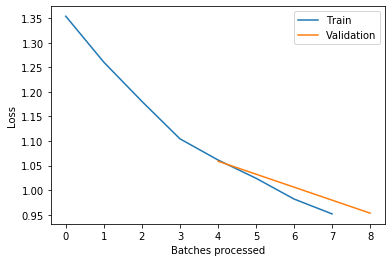

In [10]:
learn.recorder.plot_losses()
learn.show_results()